In [ ]:
# Install TensorFlow

! pip install -q tensorflow-gpu

import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Label mapping

class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


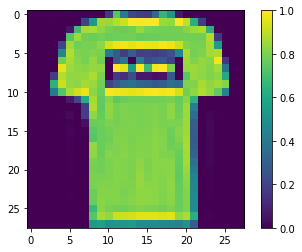

In [ ]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar();

In [ ]:
y_train[1]

0

In [ ]:
# Normalizing the dataset

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Flattening the dataset

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### **Building the Model**

In [ ]:
# Define an object

model = tf.keras.models.Sequential()

In [ ]:
# Adding first fully connected hidden layer

model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [ ]:
# Adding the second layer with dropout to prevent overfitting

model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Adding the output layer

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### **Training the model**

In [ ]:
# Compiling the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model

r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3253 - accuracy: 0.8829 - val_loss: 0.3614 - val_accuracy: 0.8688
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3229 - accuracy: 0.8835 - val_loss: 0.3564 - val_accuracy: 0.8705
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3212 - accuracy: 0.8852 - val_loss: 0.3552 - val_accuracy: 0.8728
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3202 - accuracy: 0.8854 - val_loss: 0.3595 - val_accuracy: 0.8717
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3181 - accuracy: 0.8862 - val_loss: 0.3530 - val_accuracy: 0.8734
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3167 - accuracy: 0.8860 - val_loss: 0.3524 - val_accuracy: 0.8737
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.8877 - val_loss: 0.3526 - val_accuracy:

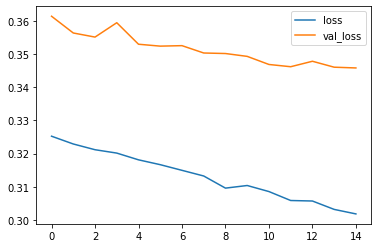

In [ ]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

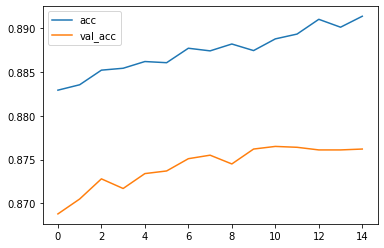

In [ ]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### **Model evaluation and prediction**

In [ ]:
# Model evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8762
Test Accuracy: 0.8762000203132629


In [ ]:
# Model prediction

y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred[15],  y_test[15] # predicted and actual output

(1, 1)

In [ ]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[800   2  16  60   7   0 105   1   9   0]
 [  1 960   2  30   4   0   3   0   0   0]
 [ 12   1 816  16 101   0  53   0   1   0]
 [ 13   8  10 912  29   0  25   0   3   0]
 [  0   1 102  36 813   0  47   0   1   0]
 [  0   0   0   1   0 938   0  37   2  22]
 [101   1 107  49  90   0 641   0  11   0]
 [  0   0   0   0   0  19   0 959   0  22]
 [  5   1   2   8   3   2   4   6 969   0]
 [  0   0   0   0   0   4   1  41   0 954]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8762
